 # <font color="blue">  <u>  Multi-class Classification </u>  </font>

In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# np.set_printoptions(precision=2)

import sys
sys.path.append('Materials_By_Deeplearning/')
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

## Multi-class Classification
Neural Networks are often used to classify data. Examples are neural networks:
- take in photos and classify subjects in the photos as {dog,cat,horse,other}
- take in a sentence and classify the 'parts of speech' of its elements: {noun, verb, adjective etc..}  

A network of this type will have multiple units in its final layer. Each output is associated with a category. When an input example is applied to the network, the output with the highest value is the category predicted. If the output is applied to a softmax function, the output of the softmax will provide probabilities of the input being in each category. 

In this lab you will see an example of building a multiclass network in Tensorflow. We will then take a look at how the neural network makes its predictions.

Let's start by creating a four-class data set.

### Prepare and visualize our data
We will use Scikit-Learn `make_blobs` function to make a training data set with 4 categories as shown in the plot below.

<b> <center> <font size= 4%> Lets see an example to understand `make_blobs` function </font> </center> </b> 


`from sklearn.datasets import make_blobs`

`X, y = make_blobs(n_samples=10, n_features=2, centers=3, random_state=0)`


Here's what the parameters mean:

<ul> 
    
`n_samples:` The total number of data points you want to generate.

`n_features:` The number of features (dimensions) for each data point.

`centers:` The number of clusters you want to generate.

`random_state:` A seed value to ensure reproducibility.
    
</ul>

The function returns two arrays:
<ul>
    
`X:` An array of shape (n_samples, n_features) containing the generated data points.

`y:` An array of shape (n_samples,) containing the labels or cluster assignments for each data point.
In the example above, the make_blobs function generates 100 data points with 2 features each, divided into 3 clusters.
</ul>
Remember that this function generates synthetic data, which can be useful for experimentation, teaching, and testing algorithms, but might not reflect real-world data distributions.

In [13]:
#example for b
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=10, centers=3, n_features=2, random_state=0)
print(X.shape)
print(X)

print(y.shape)
print(y)

                  

(10, 2)
[[ 1.12  5.76]
 [ 1.74  4.43]
 [ 2.37  0.04]
 [ 0.87  4.71]
 [-0.66  2.18]
 [ 0.74  1.46]
 [-4.08  3.57]
 [ 3.55  0.69]
 [ 2.5   1.23]
 [ 1.93  4.15]]
(10,)
[0 0 1 0 2 2 2 1 1 0]


In [19]:
"""
In this code:

classes: The number of classes (clusters) in the dataset.
m: The total number of data points you want to generate.
centers: A list of the centers for each class. Each sublist in centers represents the coordinates of the center of a class.
std: The standard deviation of each class, which determines the spread of data points around the centers.
"""
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
x_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

print("x_train.shape: ",x_train.shape)
print("y_train.shape: ",y_train.shape)
print("y_train\n",y_train)

x_train.shape:  (100, 2)
y_train.shape:  (100,)
y_train
 [3 3 3 0 3 3 3 3 2 0 2 1 1 1 0 3 2 3 1 2 3 0 1 2 2 0 3 1 0 0 3 0 3 2 3 1 1
 2 3 0 0 2 3 0 3 1 1 3 3 0 0 2 0 2 2 0 0 3 3 2 0 0 0 1 2 1 1 1 3 1 1 2 3 0
 1 2 2 0 1 1 2 2 2 1 1 0 1 0 2 3 3 0 2 1 2 1 1 2 2 0]


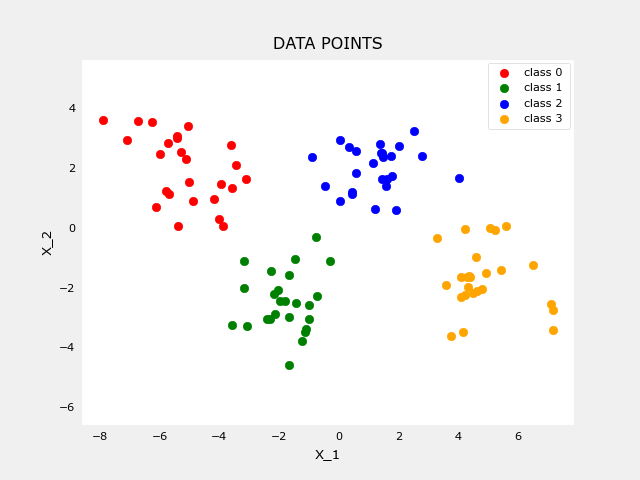

In [53]:
#PLOTTING THE DATA
_,ax = plt.subplots(1,1)

ax.set_xlabel("X_1")
ax.set_ylabel("X_2")
ax.set_title("DATA POINTS")
ax.axis("equal")

c=["red","green","blue","orange"]
for i in range (np.max(y_train)+1):
    index = np.where(y_train == i)
    lable = "class "+str(i)+" "
    ax.scatter(x_train[index,0],x_train[index,1],c=c[i],label = lable )
    ax.legend()
    plt.show

In [58]:
# show classes in data set
print(f"unique classes {np.unique(y_train)}")
# show shapes of our dataset
print(f"shape of X_train: {x_train.shape}, shape of y_train: {y_train.shape}")

unique classes [0 1 2 3]
shape of X_train: (100, 2), shape of y_train: (100,)


## Model
<img align="Right" src="./Materials_By_Deeplearning/images/C2_W2_mclass_lab_network.PNG"  style=" width:350px; padding: 10px 20px ; ">
This lab will use a 2-layer network as shown.
Unlike the binary classification networks, this network has four outputs, one for each class. Given an input example, the output with the highest value is the predicted class of the input.   

Below is an example of how to construct this network in Tensorflow. Notice the output layer uses a `linear` rather than a `softmax` activation. While it is possible to include the softmax in the output layer, it is more numerically stable if linear outputs are passed to the loss function during training. If the model is used to predict probabilities, the softmax can be applied at that point.

In [65]:
Model = Sequential([
    
    Dense(units=2, activation="relu", name="ReLU_Layer"),
    Dense(units=4, activation="linear", name="Linear_Layer")
    
],name="SoftMax_Examples")

Model.compile(
    
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.01)
    
)

Model.fit(x_train,y_train,epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 1.8840
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 1.6971
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 1.5682
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 1.4730
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 1.4078
Epoch 6/200
4/4 [==============================] - 0s 0s/step - loss: 1.3619
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 1.3207
Epoch 8/200
4/4 [==============================] - 0s 0s/step - loss: 1.2848
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 1.2574
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 1.2408
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 1.2276
Epoch 12/200
4/4 [==============================] - 0s 0s/step - loss: 1.2161
Epoch 13/200
4/4 [==============================] - 0s 5ms/step 

4/4 [==============================] - 0s 4ms/step - loss: 0.8647
Epoch 105/200
4/4 [==============================] - 0s 5ms/step - loss: 0.8571
Epoch 106/200
4/4 [==============================] - 0s 0s/step - loss: 0.8510
Epoch 107/200
4/4 [==============================] - 0s 0s/step - loss: 0.8440
Epoch 108/200
4/4 [==============================] - 0s 0s/step - loss: 0.8384
Epoch 109/200
4/4 [==============================] - 0s 4ms/step - loss: 0.8314
Epoch 110/200
4/4 [==============================] - 0s 0s/step - loss: 0.8241
Epoch 111/200
4/4 [==============================] - 0s 0s/step - loss: 0.8175
Epoch 112/200
4/4 [==============================] - 0s 0s/step - loss: 0.8096
Epoch 113/200
4/4 [==============================] - 0s 0s/step - loss: 0.8016
Epoch 114/200
4/4 [==============================] - 0s 5ms/step - loss: 0.7948
Epoch 115/200
4/4 [==============================] - 0s 6ms/step - loss: 0.7868
Epoch 116/200
4/4 [==============================] - 0s 5ms/s

In [66]:
print(Model.summary())

Model: "SoftMax_Examples"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ReLU_Layer (Dense)          (None, 2)                 6         
                                                                 
 Linear_Layer (Dense)        (None, 4)                 12        
                                                                 
Total params: 18 (72.00 Byte)
Trainable params: 18 (72.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


184/184 [==============================] - 0s 2ms/step


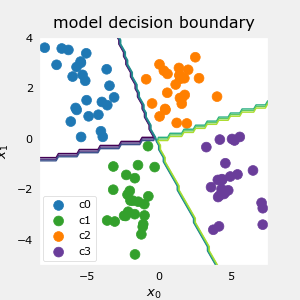

In [69]:
plt_cat_mc(x_train, y_train, Model, classes)

In [81]:
# let's examile the model efficeny 
pridection = Model.predict(x_train)
# print(pridection)
max_indices = np.argmax(pridection, axis=1)
# print(max_indices)

Same_values = y_train == max_indices
print(Same_values)

4/4 [==============================] - 0s 0s/step
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
